In this notebook we will try to answer at the following question:
# Is it possible to build a classifier to identify legendary pokémon?

In [94]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

pokemon = pd.read_csv("../dataset/pokemon.csv")

We will proceed by building a <b> decision tree </b> considering the sum of the values of the stat, the capture rate, the primary type.<br>
We will train the classifier with all the pokémon from the first to the sixth generation and some seventh-generation pokémon inserted in the subset for the proper functioning of the training.<br>
We will ask the classifier to classify the remaining pokemon. <br> 
For the proper functioning of the training, we must add to the subset a pokémon that has a base stat of 570 like Tapu Koko and a pokémon with base stat of 338 like Crabrawler.

In [95]:
subset = pd.concat([pokemon[pokemon['generation']<=6], 
                  pokemon[pokemon['name']=='Tapu Koko'], 
                  pokemon[pokemon['name']=='Crabrawler'], 
                  pokemon[pokemon['name']=='Crabominable'],
                  pokemon[pokemon['name']=='Oricorio'],
                  pokemon[pokemon['name']=='Wishiwashi'],
                  pokemon[pokemon['name']=='Wimpod'],
                  pokemon[pokemon['name']=='Dhelmise']])

In [96]:
features = ['base_total', 'capture_rate', 'type1']

In [97]:
from sklearn.preprocessing import LabelEncoder

sum_encoder = LabelEncoder()
sum_encoder.fit(subset['base_total'])

rate_encoder = LabelEncoder()
rate_encoder.fit(subset['capture_rate'])

type1_encoder = LabelEncoder()
type1_encoder.fit(subset['type1'])

subset['base_total'] = sum_encoder.transform(subset['base_total'])
subset['capture_rate'] = rate_encoder.transform(subset['capture_rate'])
subset['type1'] = type1_encoder.transform(subset['type1'])

In [98]:
from sklearn import tree

X = subset[features]

In [99]:
Y = subset['is_legendary']

In [100]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [101]:
def filter(obj):
    transformed_obj = obj[['base_total','capture_rate','type1']]
    transformed_obj['base_total'] = sum_encoder.transform([transformed_obj['base_total']])[0]
    transformed_obj['capture_rate'] = rate_encoder.transform([transformed_obj['capture_rate']])[0]
    transformed_obj['type1'] = type1_encoder.transform([transformed_obj['type1']])[0]
    return transformed_obj

In [102]:
unknown_mons = pokemon.drop(subset.index)
unknown_mons.set_index('name',inplace=True)
unknown_mons

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,,,,,,,,,,,,,,,,,,,,,
Rowlet,"['Overgrow', 'Long Reach']",1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,...,88.1,722,50,50,42,grass,flying,1.5,7,0
Dartrix,"['Overgrow', 'Long Reach']",1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,...,88.1,723,70,70,52,grass,flying,16.0,7,0
Decidueye,"['Overgrow', 'Long Reach']",1.00,2.0,1.0,0.5,1.0,0.00,2.00,2.00,2.0,...,88.1,724,100,100,70,grass,ghost,36.6,7,0
Litten,"['Blaze', 'Intimidate']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,725,60,40,70,fire,NaN,4.3,7,0
Torracat,"['Blaze', 'Intimidate']",0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,...,88.1,726,80,50,90,fire,NaN,25.0,7,0
Incineroar,"['Blaze', 'Intimidate']",1.00,0.5,1.0,1.0,1.0,2.00,0.50,1.00,0.5,...,88.1,727,80,90,60,fire,dark,83.0,7,0
Popplio,"['Torrent', 'Liquid Voice']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,728,66,56,40,water,NaN,7.5,7,0
Brionne,"['Torrent', 'Liquid Voice']",1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,...,88.1,729,91,81,50,water,NaN,17.5,7,0
Primarina,"['Torrent', 'Liquid Voice']",0.50,0.5,0.0,2.0,1.0,0.50,0.50,1.00,1.0,...,88.1,730,126,116,60,water,fairy,44.0,7,0


In [103]:
mon = filter(unknown_mons.loc['Popplio']) #try to change the pokémon name!
arr = clf.predict([mon]) 
if arr[0]:
    print('\n legendary')
else:
    print('\n non-legendary')


 non-legendary


## Classifier analysis
We build a <b> confusion matrix </b> to evaluate the goodness of our classifier.

In [104]:
tot = len(unknown_mons)
totp = len(unknown_mons[unknown_mons ['is_legendary']==1])
totn = len(unknown_mons[unknown_mons ['is_legendary']==0])

tp = 0
fp = 0
tn = 0
fn = 0

fplist = []
fnlist = []

for x in unknown_mons.index:
    pred = clf.predict([filter(unknown_mons.loc[x])])
    truth = unknown_mons.loc[x]['is_legendary']
    if pred[0]:
        if truth:
            tp+=1
        else:
            fp+=1
            fplist.append(x)
            
    else:
        if truth == 0:
            tn+=1
        else:
            fn+=1
            fnlist.append(x)
totcp = tp + fp
totcn = tn + fn

print("Total mons: " + str(tot) + ", Total leggendary: " + str(totp) + ", Total non-leggendary: " + str(totn))
print("True positive: " + str(tp) + ", False positive: " + str(fp) + ", Pokémon classified as legendary: " + str(totcp))
print("True negative: " + str(tn) + ", False negative: " + str(fn) + ", Pokémon classified as non_legendary: " + str(totcn))

Total mons: 73, Total leggendary: 16, Total non-leggendary: 57
True positive: 7, False positive: 2, Pokémon classified as legendary: 9
True negative: 55, False negative: 9, Pokémon classified as non_legendary: 64


Classify 2 non-legendary pokémon as legendary is a tolerable mistake because we do not produce a gameplay disinterest towards that species. <br>
Let's see who they are:

In [105]:
fplist

['Type: Null', 'Silvally']

Type: Null and Silvally are unique pokémon obtainable only through a certain event along the SM plot. It's acceptable to classify them as legendary.

In [106]:
from IPython.core.display import display, HTML
display(HTML("<img src='../img/silvally.png' width='300px' height='300px'>"))

Classifying legendary pokémon as common pokémon instead is a more serious mistake because the player could lose interest in particular subquest, post-league plot and pokémon events in the real world. 

In [107]:
fnlist

['Cosmog',
 'Cosmoem',
 'Nihilego',
 'Buzzwole',
 'Pheromosa',
 'Xurkitree',
 'Celesteela',
 'Kartana',
 'Guzzlord']

Cosmog and Cosmoem are false negatives for their base stat. We should refine the classifier to avoid them being considered non-legendary pokémon.<br>
We can see that the remaining false negatives are all UBs. We should consider adding a boolean is_UB field.

### Sensitivity and Specificity

In [108]:
sens = tp / totp
spec = tn / totn

print("Sensitivity: " + str(sens) + "\nSpecificity: " + str(spec))

Sensitivity: 0.4375
Specificity: 0.9649122807017544


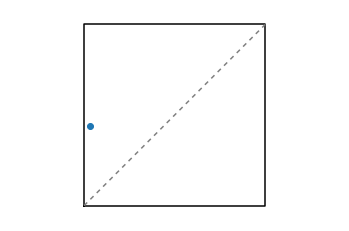

In [109]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')
plt.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')
plt.plot([1-spec], [sens], 'o')
plt.plot([0, 1], [0, 1], dashes=[3, 3], color='gray')

plt.xlim([-.1, 1.1])
plt.ylim([-.1, 1.1])
plt.axis('off')
plt.show()

The classifier we built is very simple but the graph tells us that it is an acceptable classifier.<br>
I'm sure that by analyzing more columns of the dataset than we did and adding the is_UB field it's possible to build a good classifier to identify legendary pokémon.
